# Proyek Analisis Data : [ANALISIS BIKE SHARING]
### Nama            : Leni Gustia
### Email            : mc322d5x1820@student.devacademy.id
### ID Dicoding  : MC322D5X1820

# Menentukan Pertanyaan Bisnis 
1. Bagaimana tren penyewaan sepeda dar tahun 2011-2012?
2. Kapan jam sibuk penyewaan sepeda dalam sehari?
3. Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?
4. 4 : Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

## Library yang Digunakan

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data (Mengimpor Dataset)

In [10]:
# Load dataset
day_df = pd.read_csv("day.csv", sep=';')
hour_df = pd.read_csv("hour.csv", sep=';')

### Insight
1. syntax ini digunakan untuk memanggil data yang digunakan dalam format CSV
2. Terdapat 2 data yang digunakan yaitu day dan hour

In [11]:
# Menampilkan 5 baris pertama
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01/01/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01/01/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01/01/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01/01/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Insight
1. Syntax ini menampilkan data yang diguankan, namun hanya 5 baril pertama nya saja dengan seluruh variabel

In [12]:
print("Shape of day dataset:", day_df.shape)
print("Shape of hour dataset:", hour_df.shape)


Shape of day dataset: (731, 16)
Shape of hour dataset: (17379, 17)


### Insight
1. Pada data Bike sharing bagian day terdapat 731 dataset dengan 16 variabel
2. Pada data Bike sharing bagian hour terdapat 17.379 dataset dengan 17 variabel

### Assessing Data (Menganalisis Struktur dan Kualitas Data)

In [13]:
# Menampilkan informasi dataset
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Insight
1. Pada kedua data, tidak terdapat data kosong dan terlihat tipe data setiap variabel. Contohnya pada variabel cnt bertipe integer

In [14]:
# Mengecek nilai yang hilang
print(day_df.isnull().sum())
print(hour_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [15]:
# Mengecek duplikasi
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

0
0


### Insight
1. Tidak terdapat baris yang di duplikat pada kedua data tersebut

In [16]:
# Statistik deskriptif
display(day_df.describe())
display(hour_df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Insight
1. Pada output, terdapat statistika deskriptif setiap variabel seperti mean, median, standar deviasi, dll. 
Contohnya, variabel instant dengan mean sebesar 366 dan standar deviasi sebesar 211.165812 pada data day

## Exploratory Data Analysis (EDA)

In [17]:
# Agregasi per tahun
yearly_trend = day_df.groupby("yr")["cnt"].sum().reset_index()
yearly_trend['yr'] = yearly_trend['yr'].map({0: "2011", 1: "2012"})

# Menampilkan hasil agregasi per tahun
print("Agregasi Penyewaan Sepeda per Tahun:")
display(yearly_trend)

Agregasi Penyewaan Sepeda per Tahun:


,yr,cnt
0,2011,1243103
1,2012,2049576


### Insight
1. Dari hasil di atas, didapatka bahwa jumlah total penyewaan sepeda pada tahun 2011 sebesar 1243103 dan pada tahun 2012 sebesar 	2049576. 
2. Terjadi peningkatan penyewaan sepeda dari tahun 2011 ke tahun 2012.

In [18]:
# Agregasi per jam
hourly_trend = hour_df.groupby("hr")["cnt"].mean().reset_index()
# Menampilkan hasil agregasi per jam
print("Rata-rata Penyewaan Sepeda per Jam:")
display(hourly_trend)

Rata-rata Penyewaan Sepeda per Jam:


,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


### Insight
1. Agregasi ini menunjukkan rata-rata jumlah sepeda yang disewa pada setiap jam dalam sehari.
2. Dengan melihat tren per jam, kita bisa memahami jam sibuk (peak hours) dan jam sepi (off-peak hours) dalam penyewaan sepeda.

In [19]:
# Korelasi antara faktor cuaca dan jumlah penyewaan
cuaca_vars = ["temp", "hum", "windspeed", "weathersit"]
correlation = day_df[["cnt"] + cuaca_vars].corr()
print(correlation)

                 cnt      temp       hum  windspeed  weathersit
cnt         1.000000  0.627494 -0.100659  -0.234545   -0.297391
temp        0.627494  1.000000  0.126963  -0.157944   -0.120602
hum        -0.100659  0.126963  1.000000  -0.248489    0.591045
windspeed  -0.234545 -0.157944 -0.248489   1.000000    0.039511
weathersit -0.297391 -0.120602  0.591045   0.039511    1.000000


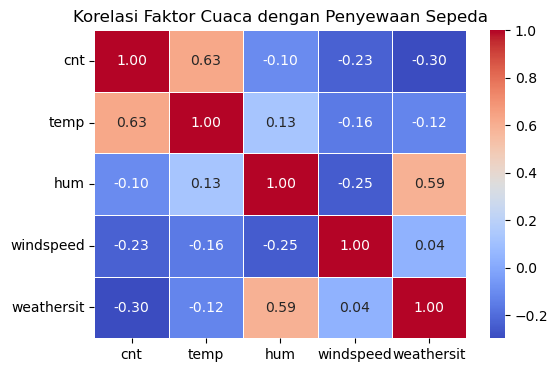

In [20]:
# Heatmap korelasi
plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi Faktor Cuaca dengan Penyewaan Sepeda")
plt.show()

### Insight
1. Suhu (temp) memiliki korelasi positif kuat dengan jumlah penyewaan sepeda (0.627)
> Semakin tinggi suhu, semakin banyak penyewaan sepeda. Artinya, cuaca hangat lebih mendorong orang untuk menyewa sepeda.
2. Kelembaban (hum) memiliki korelasi negatif lemah (-0.10)
> Korelasinya sangat kecil, berarti kelembaban tidak terlalu mempengaruhi jumlah penyewaan.
3. Kecepatan angin (windspeed) memiliki korelasi negatif (-0.23)
> Semakin tinggi kecepatan angin, semakin rendah jumlah penyewaan sepeda.
Ini masuk akal karena kondisi berangin bisa menyulitkan pengendara sepeda.
4. Weathersit (kondisi cuaca) memiliki korelasi negatif cukup signifikan (-0.297) 
> Cuaca buruk (hujan, berkabut, salju) cenderung menurunkan jumlah penyewaan.

In [21]:
# Agregasi jumlah penyewaan berdasarkan hari kerja vs akhir pekan
workingday_trend = day_df.groupby("workingday")["cnt"].mean().reset_index()
workingday_trend['workingday'] = workingday_trend['workingday'].map({0: "Weekend", 1: "Weekday"})
# Menampilkan hasil agregasi
print(workingday_trend)

  workingday          cnt
0    Weekend  4330.168831
1    Weekday  4584.820000


### Insight
1. Hari kerja (Weekday) memiliki rata-rata penyewaan lebih tinggi (4.584 sepeda/hari) dibandingkan akhir pekan (Weekend) yang hanya 4.330 sepeda/hari.
2. Ini menunjukkan bahwa penyewaan sepeda lebih banyak terjadi pada hari kerja, kemungkinan besar karena digunakan untuk transportasi

## Visualization & Explanatory Analysis

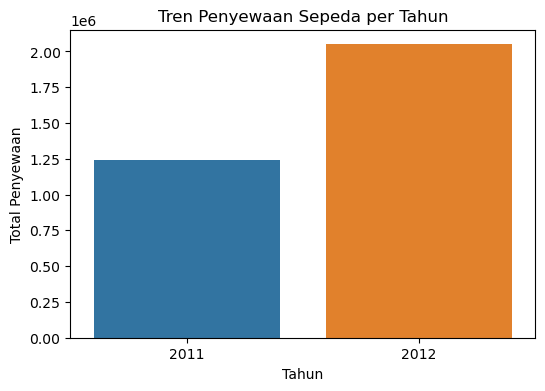

In [22]:
# Pertanyaan 1. Bagaimana tren penyewaan sepeda dar tahun 2011-2012?

plt.figure(figsize=(6,4))
sns.barplot(x='yr', y='cnt', data=yearly_trend)
plt.title("Tren Penyewaan Sepeda per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Penyewaan")
plt.show()

### Insight

1. Terjadi peningkatan signifikan dalam jumlah penyewaan sepeda dari tahun 2011 ke 2012. Pada 2011, total penyewaan sekitar 1,24 juta, sedangkan pada 2012 meningkat menjadi 2,05 juta.
2. Kenaikan jumlah penyewaan menunjukkan peningkatan minat masyarakat dalam menggunakan sepeda.

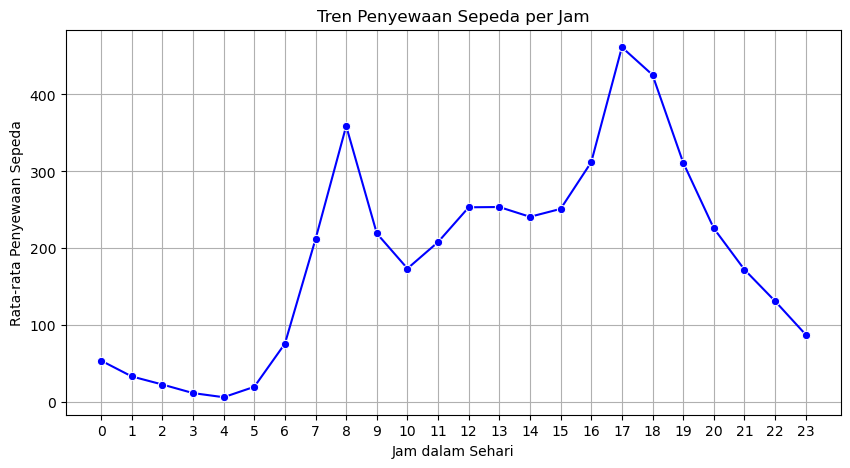

In [23]:
## Pertanyaan 2: Kapan jam sibuk penyewaan sepeda dalam sehari?

plt.figure(figsize=(10,5))
sns.lineplot(x="hr", y="cnt", data=hourly_trend, marker="o", linestyle="-", color="b")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Penyewaan Sepeda per Jam")
plt.xticks(range(0, 24))  # Memastikan sumbu x dari 0 sampai 23
plt.grid(True)
plt.show()

### Insight
1. Jam Sibuk Penyewaan
> Puncak pertama terjadi sekitar pukul 8 pagi, kemungkinan karena perjalanan ke kantor/sekolah.
> Puncak kedua dan terbesar terjadi sekitar pukul 5-6 sore, kemungkinan karena perjalanan pulang atau aktivitas rekreasi.

2. Jam Sepi Penyewaan
> Penyewaan sepeda sangat rendah pada pukul 0:00 - 5:00, yang masuk akal karena waktu istirahat malam.

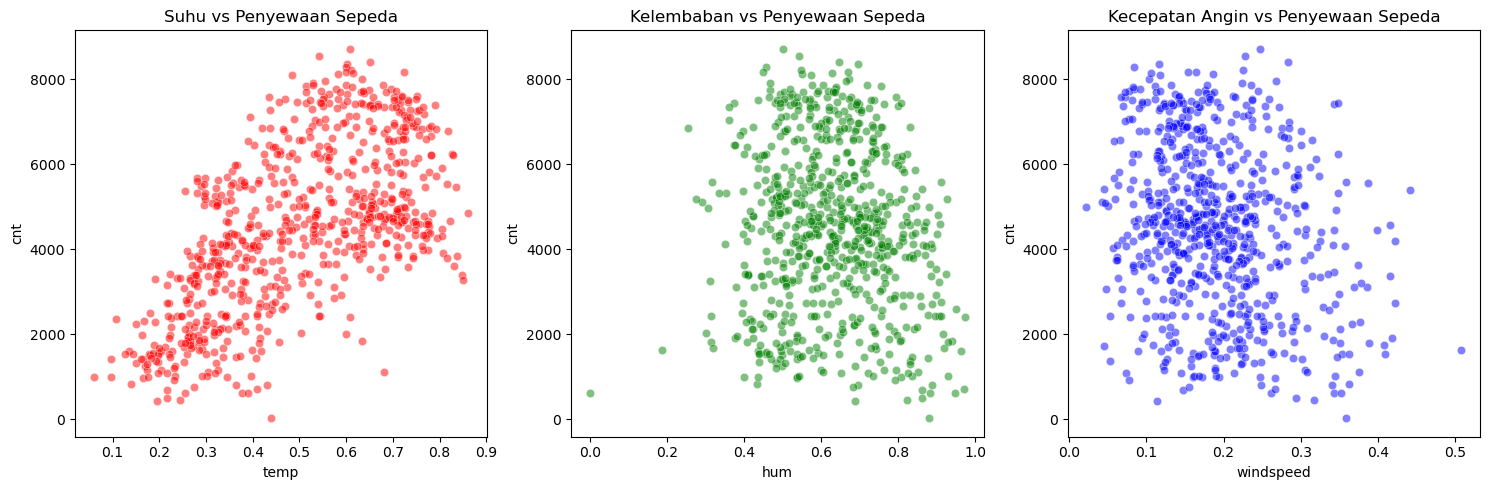

In [24]:
## Pertanyaan 3: Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?

fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Scatter plot suhu vs penyewaan
sns.scatterplot(ax=axes[0], x="temp", y="cnt", data=day_df, alpha=0.5, color='r')
axes[0].set_title("Suhu vs Penyewaan Sepeda")

# Scatter plot kelembaban vs penyewaan
sns.scatterplot(ax=axes[1], x="hum", y="cnt", data=day_df, alpha=0.5, color='g')
axes[1].set_title("Kelembaban vs Penyewaan Sepeda")

# Scatter plot kecepatan angin vs penyewaan
sns.scatterplot(ax=axes[2], x="windspeed", y="cnt", data=day_df, alpha=0.5, color='b')
axes[2].set_title("Kecepatan Angin vs Penyewaan Sepeda")

plt.tight_layout()
plt.show()

### Insight
1. Suhu vs Penyewaan Sepeda
> Scatter plot menunjukkan bahwa semakin tinggi suhu, jumlah penyewaan sepeda cenderung meningkat.
>Korelasi 0.63 menunjukkan hubungan positif yang cukup kuat antara suhu dan jumlah penyewaan.

2. Kelembaban vs Penyewaan Sepeda
> Scatter plot menunjukkan bahwa kelembaban tidak memiliki pola yang jelas terhadap penyewaan sepeda.
> Korelasi -0.10 menunjukkan hubungan yang sangat lemah dan hampir tidak signifikan.

3. Kecepatan Angin vs Penyewaan Sepeda
> Scatter plot menunjukkan bahwa kecepatan angin memiliki sedikit pengaruh terhadap penyewaan sepeda.
> Korelasi -0.23 menunjukkan hubungan negatif yang lemah, artinya semakin tinggi kecepatan angin, jumlah penyewaan cenderung sedikit berkurang.

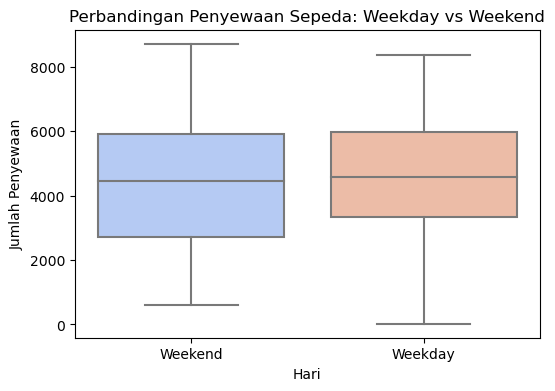

In [25]:
## Pertanyaan 4 : Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

plt.figure(figsize=(6,4))
sns.boxplot(x="workingday", y="cnt", data=day_df, palette="coolwarm")
plt.title("Perbandingan Penyewaan Sepeda: Weekday vs Weekend")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks([0,1], ["Weekend", "Weekday"])
plt.show()

### Insight
1. Rata-rata penyewaan lebih tinggi (4.584 sepeda/hari) dibanding akhir pekan (4.330 sepeda/hari). Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama di hari kerja, mungkin untuk perjalanan ke kantor atau sekolah.
2. Hari kerja (weekday): Penyewaan didominasi oleh kebutuhan transportasi, dengan dua puncak signifikan di pagi dan sore hari.
3. Akhir pekan (weekend): Penyewaan lebih stabil sepanjang hari, kemungkinan besar untuk rekreasi atau aktivitas santai.

## Analisis Lanjutan

# Analisis Clustering Penyewaan Sepeda dengan                                K-Means

## Tujuan Analisis
Analisis ini bertujuan untuk mengelompokkan pola penyewaan sepeda berdasarkan suhu menggunakan algoritma K-Means Clustering. Dengan melakukan clustering, kita dapat memahami bagaimana suhu mempengaruhi jumlah penyewaan sepeda dan mengidentifikasi pola tertentu dalam data.

In [26]:
# Load dataset
day_df = pd.read_csv("day.csv", sep=';')

### Load Data
> Dataset dibaca menggunakan pd.read_csv(), dengan delimiter ;. Dataset ini berisi informasi terkait penyewaan sepeda per hari dengan berbagai variabel.


In [27]:
# Pilih fitur yang akan digunakan untuk clustering
features = ["temp", "hum", "windspeed", "weathersit"]
X = day_df[features]

> Fitur yang digunakan untuk clustering adalah:
- temp (Suhu)
- hum (Kelembapan)
- windspeed (Kecepatan angin)
- weathersit (Kondisi cuaca)

In [28]:
from sklearn.preprocessing import StandardScaler
# Standarisasi data (agar skala antar fitur setara)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Standardisasi Data
> Karena fitur memiliki skala yang berbeda-beda, dilakukan standardisasi menggunakan StandardScaler() agar setiap fitur memiliki skala yang sama, yaitu dengan rata-rata 0 dan standar deviasi 1.

In [29]:
## Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):  # Coba cluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

### Menentukan Jumlah Cluster Optimal dengan Elbow Method
> Metode Elbow digunakan untuk menentukan jumlah cluster optimal. WCSS (Within-Cluster Sum of Squares) dihitung untuk berbagai jumlah cluster (1 hingga 10). Nilai WCSS menurun seiring bertambahnya jumlah cluster, dan jumlah cluster optimal ditentukan dari "titik siku" grafik Elbow.

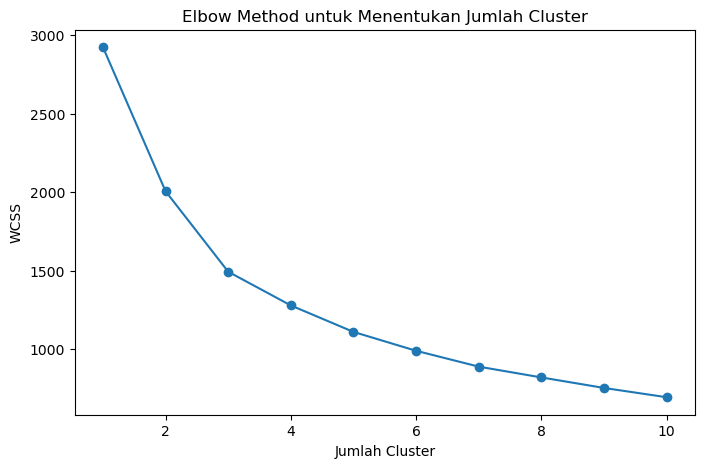

In [30]:
# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.show()

### Visualisasi Elbow Method
> Grafik Elbow Method ditampilkan untuk membantu memilih jumlah cluster optimal. Dari grafik terlihat bahwa jumlah cluster optimal adalah 3 (titik patahan grafik).

In [31]:
##  Menerapkan K-Means dengan jumlah cluster optimal (dari grafik, patahannya K=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
day_df["Cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


### Menerapkan K-Means dengan 3 Cluster
Model K-Means dijalankan dengan jumlah 3 cluster, kemudian hasil cluster ditambahkan ke dalam dataset sebagai kolom baru "Cluster".

In [32]:
# Melihat jumlah data dalam setiap cluster
print(day_df["Cluster"].value_counts())

Cluster
1    272
2    244
0    215
Name: count, dtype: int64


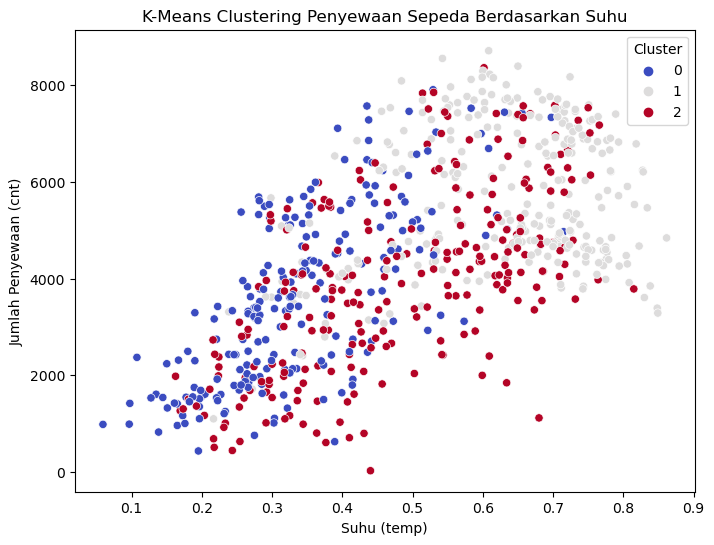

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=day_df["temp"], y=day_df["cnt"], hue=day_df["Cluster"], palette="coolwarm")
plt.xlabel("Suhu (temp)")
plt.ylabel("Jumlah Penyewaan (cnt)")
plt.title("K-Means Clustering Penyewaan Sepeda Berdasarkan Suhu")
plt.legend(title="Cluster")
plt.show()

### Hasil dan Interpretasi
1. Semakin tinggi suhu, semakin tinggi jumlah penyewaan sepeda.
2. Cluster yang terbentuk menunjukkan perbedaan pola penyewaan berdasarkan tingkat suhu:

>Cluster 0 (Biru): Suhu rendah dengan jumlah penyewaan rendah sebanyak 272 penyewa.

>Cluster 1 (Abu-Abu): Suhu sedang dengan jumlah penyewaan lebih tinggi sebanyak 244 penyewa.

>Cluster 2 (Merah): Suhu tinggi dengan jumlah penyewaan tertinggi sebanyak 215 penyewa.

## Conclusion


- Conclution Pertanyaan 1 : Bagaimana tren penyewaan sepeda dari tahun 2011-2012?

> Tren penyewaan sepeda meningkat dari tahun 2011 ke 2012. Jumlah total penyewaan sepeda pada tahun 2012 jauh lebih tinggi dibandingkan dengan tahun 2011, yang menunjukkan peningkatan popularitas atau permintaan akan layanan penyewaan sepeda.

- Conclution pertanyaan 2 : Kapan jam sibuk penyewaan sepeda dalam sehari?

> Terdapat dua puncak utama dalam penyewaan sepeda, yaitu pada pagi hari sekitar pukul 8 dan pada sore hari sekitar pukul 17-18. Hal ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk keperluan komuter, seperti pergi dan pulang kerja atau sekolah.

- Conclution pertanyaan 3 : Bagaimana kondisi cuaca memengaruhi jumlah penyewaan sepeda?

> Suhu (temp): Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda, di mana semakin tinggi suhu, semakin banyak sepeda yang disewa.

> Kelembaban (hum): Kelembaban yang terlalu tinggi tampaknya berpengaruh negatif terhadap penyewaan sepeda, dengan jumlah penyewaan cenderung lebih sedikit pada kelembaban yang sangat tinggi.

> Kecepatan angin (windspeed): Tidak terlihat hubungan yang jelas antara kecepatan angin dan jumlah penyewaan sepeda, tetapi angin yang terlalu kencang mungkin sedikit mengurangi jumlah penyewaan.


- Conclution pertanyaan 4 : Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?
> Rata-rata penyewaan sepeda per hari lebih tinggi pada hari kerja (4.584 sepeda/hari) dibandingkan akhir pekan (4.330 sepeda/hari). Hal ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama saat hari kerja.

> Pola penyewaan pada hari kerja lebih terfokus pada jam sibuk, menunjukkan penggunaan untuk keperluan komuter. Sebaliknya, pada akhir pekan, penyewaan lebih merata sepanjang hari, mengindikasikan penggunaan untuk rekreasi atau aktivitas santai.

# THANK YOU